In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy
from z3 import *

<img src="https://logic-masters.de/Dateien/bild.php?data=da58bd94-10923-303030355a482d31" width="450">

In [2]:
def sol_print(solution):
    x= np.ones((3,3))
    groups = np.block([[x*0,x*1,x*2],[x*3,x*4,x*5],[x*6,x*7,x*8]])
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    count = 0
    x = np.array(solution.astype('int').astype('str'))
    x[x=="0"] ="-"
    y = groups
    ax = sns.heatmap(y,annot=x,cbar=False,cmap="tab20",fmt="",vmin=0,vmax=19,linewidths=1,annot_kws={"size":14})
    ax.axis("off")    
    plt.tight_layout()
    plt.show()

In [3]:
soln =[[7,5,3,8,1,2,6,9,4],
       [2,9,8,4,7,6,3,5,1],
       [6,1,4,5,9,3,8,7,2],
       [5,4,7,9,3,8,1,2,6],
       [9,8,6,7,2,1,5,4,3],
       [3,2,1,6,4,5,9,8,7],
       [4,7,5,3,6,9,2,1,8],
       [1,6,9,2,8,7,4,3,5],
       [8,3,2,1,5,4,7,6,9]]

Solved in 2131.998417854309 seconds


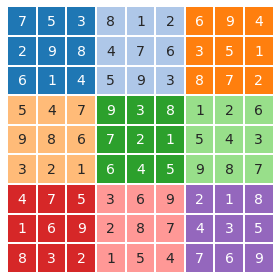

In [5]:
def z3_sudoku(grid,fixed):

    # 9x9 matrix of integer variables
    X = [ [Int("x_%s_%s" % (i+1, j+1)) for j in range(9) ]  for i in range(9) ]

    # each cell contains a value in {1, ..., 9}
    cells_c  = [ And(1 <= X[i][j], X[i][j] <= 9)
             for i in range(9) for j in range(9) ]

    # each row contains a digit at most once
    rows_c   = [ Distinct(X[i]) for i in range(9) ]

    # each column contains a digit at most once
    cols_c   = [ Distinct([ X[i][j] for i in range(9) ])
             for j in range(9) ]

    # each 3x3 square contains a digit at most once
    sq_c     = [ Distinct([ X[3*i0 + i][3*j0 + j]
                        for i in range(3) for j in range(3) ])
             for i0 in range(3) for j0 in range(3) ]

    sudoku_c = cells_c + rows_c + cols_c + sq_c

    s = Solver()
    s.add(sudoku_c)
    
    
    knight_moves = [f(i,j) for i,j in itertools.product([1, -1],[2,-2]) for f in [lambda i,j:(i,j),lambda i,j:(j,i)]]
    
    s+= [X[i][j] != X[i+a][j+b] for a,b in knight_moves for i in range(9) for j in range(9) 
                    if i+a >=0 and i+a<9 and j+b >=0 and j+b<9]

    s += Sum([X[4+i][0+i] for i in range(5)]) == 23
    s += Sum([X[0+i][5-i] for i in range(6)]) == 32
    
    s+= Sum([X[5][0+i] for i in range(3)]) == X[5][3]
    s+= X[4][2]==X[5][3]
    s+= X[6][4]==X[5][3]
    s+= Sum([X[6+i][3] for i in range(3)]) == X[5][3]
    s+= Sum([X[4][4],X[3][4],X[4][5]]) == X[5][3]
    
    s+= X[3][2] == X[4][3]
    
    s+= X[5][7] == X[6][8]
    
    s+= Or(X[0][4]/X[0][5] ==2,X[0][5]/X[0][4] == 2)
    s+= Or(X[0][6]/X[1][6] ==2,X[1][6]/X[0][6] == 2)
    s+= Or(X[3][8]/X[4][8] ==2,X[4][8]/X[3][8] == 2)
    s+= Or(X[6][6]/X[6][7] ==2,X[6][7]/X[6][6] == 2)
    s+= Or(X[6][6]/X[7][6] ==2,X[7][6]/X[6][6] == 2)
    
    s += Sum([X[1][4],X[1][5],X[2][4],X[2][5],X[3][5],X[3][6],X[3][7],X[4][6],X[4][7]]) == 45
    
    start = time.time()
    if s.check() == sat:
        m = s.model()
        r = [ [ m.evaluate(X[i][j]).as_long() for j in range(9) ]
                 for i in range(9) ]
        print("Solved in {} seconds".format(time.time()-start))
        sol_print(np.array(r))

    else:
        print("Failed in {} seconds".format(time.time()-start))

z3_sudoku(np.zeros((9,9)),soln)

In [6]:
2132/60

35.53333333333333